<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Compare-with-old-predictions" data-toc-modified-id="Compare-with-old-predictions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Compare with old predictions</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir
from datetime import datetime

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

In [2]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout, Flatten, AveragePooling1D

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [3]:
# Display the all the columns of Data Frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
train = pd.read_csv('CSE_DSIntro1_TRAIN.csv')
test = pd.read_csv('CSE_DSIntro1_TEST.csv')

In [5]:
col_1_3 = ['Mean', 'Std', 'Rms']

col_4_53 = ['RF'+str(x) for x in range(1,51)]

col_54_77 = ['NoOfHighPowFrq', 'RecTimeOfRfs', 'RecFrqOfRFs', 'NoOfSamples', '1stMagRead', 'X1', 'Y1', 'Z1', 
             '2ndMagRead', 'X2', 'Y2', 'Z2', 'S_Hour', 'S_Minute', 'S_Second', 'S_Day', 'S_Month', 'S_Year', 
             'E_Hour', 'E_Minute', 'E_Second', 'E_Day', 'E_Month', 'E_Year' ]

In [6]:
column_indices = [np.r_[1:78]]
new_names = col_1_3 + col_4_53 +col_54_77
old_names = train.columns[column_indices]
train.rename(columns=dict(zip(old_names, new_names)), inplace=True)
test.rename(columns=dict(zip(old_names, new_names)), inplace=True)

C:\Users\Vipooshan\anaconda3\envs\tf\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [7]:
train.head()

,Id,Mean,Std,Rms,RF1,RF2,RF3,RF4,RF5,RF6,RF7,RF8,RF9,RF10,RF11,RF12,RF13,RF14,RF15,RF16,RF17,RF18,RF19,RF20,RF21,RF22,RF23,RF24,RF25,RF26,RF27,RF28,RF29,RF30,RF31,RF32,RF33,RF34,RF35,RF36,RF37,RF38,RF39,RF40,RF41,RF42,RF43,RF44,RF45,RF46,RF47,RF48,RF49,RF50,NoOfHighPowFrq,RecTimeOfRfs,RecFrqOfRFs,NoOfSamples,1stMagRead,X1,Y1,Z1,2ndMagRead,X2,Y2,Z2,S_Hour,S_Minute,S_Second,S_Day,S_Month,S_Year,E_Hour,E_Minute,E_Second,E_Day,E_Month,E_Year,Category
0,1,77041.5,44471.03389,88955.41342,1602.4632,1787.3628,1571.6466,1294.2972,1664.0964,1756.5462,1016.9478,801.2316,1510.0134,1355.9304,1047.7644,1848.996,1109.3976,1140.2142,1694.913,1386.747,1078.581,986.1312,523.8822,739.5984,1479.1968,1417.5636,1171.0308,616.332,955.3146,893.6814,585.5154,770.415,554.6988,708.7818,1201.8474,924.498,832.0482,1232.664,862.8648,369.7992,677.9652,431.4324,400.6158,308.166,277.3494,215.7162,338.9826,184.8996,246.5328,154.083,123.2664,92.4498,30.8166,61.6332,1834,32,308166,10000,63635.31373,1.527772,0.073608,1.511108,63642.86256,1.527652,0.073507,1.511320,11,23,15,22,2,2021,11,23,15,22,2,2021,0
1,2,77120.0,44516.34682,89046.05288,1573.2480,2128.5120,987.1360,956.2880,1511.5520,1388.1600,1881.7280,1789.1840,1604.0960,1172.2240,1295.6160,1696.640,832.8960,1419.0080,1326.464,1449.856,678.656,1357.3120,1017.9840,493.5680,1203.0720,616.9600,1141.3760,894.592,1110.5280,1079.6800,555.2640,647.808,925.4400,771.2000,1233.9200,586.112,802.0480,740.352,863.7440,1048.8320,709.5040,401.0240,524.4160,431.872,308.4800,185.0880,277.6320,215.9360,339.3280,154.240,123.3920,92.5440,30.8480,61.6960,2167,32,308480,10000,63656.80693,1.527630,0.073701,1.511097,63649.22304,1.527373,0.073794,1.511169,11,23,15,22,2,2021,11,23,15,22,2,2021,0
2,3,77120.0,44516.34682,89046.05288,1789.1840,1511.5520,1665.7920,1326.4640,1357.3120,1634.9440,1388.1600,1573.2480,678.6560,277.6320,1604.0960,1172.224,1758.3360,956.2880,802.048,1233.920,1079.680,308.4800,1419.0080,832.8960,987.1360,740.3520,1912.5760,1141.376,925.4400,709.5040,431.8720,1264.768,771.2000,1542.4000,894.5920,555.264,1017.9840,863.744,586.1120,616.9600,1048.8320,493.5680,524.4160,370.176,462.7200,647.8080,185.0880,215.9360,154.2400,246.784,123.3920,92.5440,30.8480,61.6960,2568,32,308480,10000,63648.70842,1.527451,0.073684,1.511247,63658.20567,1.527631,0.073571,1.511256,11,23,15,22,2,2021,11,23,15,22,2,2021,0
3,4,77117.5,44514.90373,89043.16628,1511.5030,1789.1260,1233.8800,1881.6670,1418.9620,2159.2900,1388.1150,1110.4920,1141.3390,987.1040,709.4810,1573.197,1480.6560,1264.7270,431.858,1326.421,740.328,401.0110,1172.1860,1203.0330,1079.6450,894.5630,1295.5740,802.022,678.6340,925.4100,339.3170,616.940,1048.7980,863.7160,832.8690,586.093,308.4700,1017.951,771.1750,647.7870,524.3990,462.7050,493.5520,555.246,215.9290,277.6230,185.0820,370.1640,154.2350,246.776,123.3880,92.5410,30.8470,61.6940,2405,32,308470,10000,63646.45414,1.527544,0.073631,1.511245,63655.53620,1.527550,0.073430,1.511489,11,23,16,22,2,2021,11,23,16,22,2,2021,0
4,5,77120.0,44516.34682,89046.05288,1974.2720,1696.6400,832.8960,1820.0320,1758.3360,1727.4880,1295.6160,1388.1600,1789.1840,1326.4640,1634.9440,2190.208,1079.6800,678.6560,1480.704,1912.576,246.784,1850.8800,2035.9680,2344.4480,1542.4000,493.5680,1233.9200,1203.072,1017.9840,1665.7920,185.0880,1172.224,215.9360,987.1360,616.9600,1141.376,462.7200,894.592,524.4160,740.3520,802.0480,771.2000,277.6320,1048.832,925.4400,709.5040,586.1120,647.8080,308.4800,123.392,339.3280,92.5440,30.8480,61.6960,3149,32,308480,10000,63653.44768,1.527329,0.073626,1.511409,63637.01387,1.527490,0.073543,1.511393,11,23,16,22,2,2021,11,23,16,22,2,2021,0


In [8]:
test.head()

,Id,Mean,Std,Rms,RF1,RF2,RF3,RF4,RF5,RF6,RF7,RF8,RF9,RF10,RF11,RF12,RF13,RF14,RF15,RF16,RF17,RF18,RF19,RF20,RF21,RF22,RF23,RF24,RF25,RF26,RF27,RF28,RF29,RF30,RF31,RF32,RF33,RF34,RF35,RF36,RF37,RF38,RF39,RF40,RF41,RF42,RF43,RF44,RF45,RF46,RF47,RF48,RF49,RF50,NoOfHighPowFrq,RecTimeOfRfs,RecFrqOfRFs,NoOfSamples,1stMagRead,X1,Y1,Z1,2ndMagRead,X2,Y2,Z2,S_Hour,S_Minute,S_Second,S_Day,S_Month,S_Year,E_Hour,E_Minute,E_Second,E_Day,E_Month,E_Year
0,1,77117.5,44514.90373,89043.16628,1696.585,1665.738,1418.962,1264.727,1203.033,1573.197,709.481,1172.186,1480.656,925.410,1943.361,863.716,1511.503,462.705,1048.798,1141.339,1079.645,1542.350,431.858,771.175,1110.492,1388.115,956.257,832.869,1357.268,894.563,678.634,647.787,1295.574,1017.951,740.328,1233.880,524.399,586.093,802.022,370.164,555.246,616.940,215.929,493.552,185.082,277.623,308.470,339.317,154.235,246.776,123.388,92.541,30.847,61.694,3694,32,308470,10000,63696.73992,1.527892,0.073235,1.511481,63697.96460,1.527815,0.073497,1.511214,11,42,36,22,2,2021,11,42,36,22,2,2021
1,2,77120.0,44516.34682,89046.05288,1357.312,339.328,1326.464,1017.984,1573.248,1604.096,1264.768,1634.944,1820.032,925.440,1789.184,678.656,1388.160,1048.832,709.504,277.632,1758.336,740.352,616.960,1419.008,308.480,1203.072,1172.224,555.264,1141.376,647.808,524.416,987.136,431.872,493.568,1079.680,894.592,1110.528,586.112,1233.920,401.024,863.744,832.896,185.088,771.200,802.048,462.720,956.288,215.936,123.392,370.176,246.784,92.544,30.848,61.696,4019,32,308480,10000,63692.55861,1.527921,0.073413,1.511241,63707.62973,1.527853,0.073633,1.511019,11,42,36,22,2,2021,11,42,36,22,2,2021
2,3,77120.0,44516.34682,89046.05288,1758.336,1974.272,1480.704,1141.376,1542.400,1388.160,1357.312,1449.856,1079.680,956.288,987.136,1017.984,1634.944,586.112,1326.464,863.744,431.872,1419.008,1233.920,524.416,832.896,802.048,401.024,1110.528,925.440,894.592,339.328,1172.224,616.960,740.352,1203.072,1048.832,555.264,771.200,185.088,678.656,709.504,308.480,493.568,647.808,154.240,462.720,370.176,277.632,123.392,215.936,246.784,92.544,30.848,61.696,3567,32,308480,10000,63696.82226,1.527971,0.073253,1.511402,63699.33986,1.527973,0.073148,1.511530,11,42,36,22,2,2021,11,42,37,22,2,2021
3,4,77120.0,44516.34682,89046.05288,1110.528,1264.768,1388.160,1449.856,1573.248,1419.008,1295.616,1511.552,771.200,1233.920,1357.312,709.504,1203.072,1727.488,1326.464,863.744,1480.704,925.440,1172.224,1079.680,1048.832,894.592,616.960,832.896,740.352,1017.984,1141.376,802.048,339.328,586.112,524.416,987.136,462.720,956.288,555.264,678.656,647.808,215.936,493.568,431.872,308.480,401.024,277.632,370.176,185.088,246.784,154.240,123.392,92.544,61.696,2494,32,308480,10000,63697.58116,1.527846,0.073415,1.511293,63691.57205,1.527999,0.073202,1.511444,11,42,37,22,2,2021,11,42,37,22,2,2021
4,5,77120.0,44516.34682,89046.05288,2652.928,2005.120,1943.424,493.568,1388.160,740.352,2529.536,1573.248,1295.616,1172.224,2097.664,894.592,616.960,1604.096,925.440,1881.728,1820.032,1141.376,308.480,709.504,462.720,1912.576,1357.312,1511.552,1017.984,863.744,1696.640,2436.992,802.048,1542.400,1110.528,1326.464,832.896,555.264,1264.768,771.200,1203.072,1048.832,1727.488,1079.680,1480.704,956.288,987.136,647.808,1634.944,1233.920,339.328,246.784,61.696,30.848,3877,32,308480,10000,63700.49247,1.528052,0.073395,1.511170,63691.78617,1.527921,0.073248,1.511445,11,42,37,22,2,2021,11,42,37,22,2,2021


In [9]:
train.S_Hour.value_counts()

11    2500
Name: S_Hour, dtype: int64

In [10]:
train.S_Minute.value_counts()

24    137
25    135
26    134
27    133
29    132
30    131
32    130
33    130
31    130
28    129
35    128
37    126
36    126
34    126
39    125
38    125
40    125
41    121
23    103
42     74
Name: S_Minute, dtype: int64

In [11]:
test.S_Hour.value_counts()

11    1591
Name: S_Hour, dtype: int64

In [12]:
test.S_Minute.value_counts()

44    122
43    121
45    121
47    120
46    119
49    119
51    118
48    117
50    117
52    116
54    116
53    115
55    115
42     50
56      5
Name: S_Minute, dtype: int64

In [13]:
train["Date"] = pd.to_datetime(train["S_Year"].astype(str) + "/" + train["S_Month"].astype(str) + "/" + train["S_Day"].astype(str))
test["Date"] = pd.to_datetime(test["S_Year"].astype(str) + "/" + test["S_Month"].astype(str) + "/" + test["S_Day"].astype(str))

In [14]:
train['Time'] = (pd.to_datetime(train['S_Hour'].astype(str) + ':' + train['S_Minute'].astype(str)+ ':' + train['S_Second'].astype(str), format='%H:%M:%S')
          .dt.time)
test['Time'] = (pd.to_datetime(test['S_Hour'].astype(str) + ':' + test['S_Minute'].astype(str)+ ':' + test['S_Second'].astype(str), format='%H:%M:%S')
          .dt.time)

In [15]:
train['DateTime'] = pd.to_datetime(train['Date'].astype(str) + ' ' + train['Time'].astype(str))
test['DateTime'] = pd.to_datetime(test['Date'].astype(str) + ' ' + test['Time'].astype(str))

In [16]:
train.set_index('DateTime', inplace=True)
train.head()

,Id,Mean,Std,Rms,RF1,RF2,RF3,RF4,RF5,RF6,RF7,RF8,RF9,RF10,RF11,RF12,RF13,RF14,RF15,RF16,RF17,RF18,RF19,RF20,RF21,RF22,RF23,RF24,RF25,RF26,RF27,RF28,RF29,RF30,RF31,RF32,RF33,RF34,RF35,RF36,RF37,RF38,RF39,RF40,RF41,RF42,RF43,RF44,RF45,RF46,RF47,RF48,RF49,RF50,NoOfHighPowFrq,RecTimeOfRfs,RecFrqOfRFs,NoOfSamples,1stMagRead,X1,Y1,Z1,2ndMagRead,X2,Y2,Z2,S_Hour,S_Minute,S_Second,S_Day,S_Month,S_Year,E_Hour,E_Minute,E_Second,E_Day,E_Month,E_Year,Category,Date,Time
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-22 11:23:15,1,77041.5,44471.03389,88955.41342,1602.4632,1787.3628,1571.6466,1294.2972,1664.0964,1756.5462,1016.9478,801.2316,1510.0134,1355.9304,1047.7644,1848.996,1109.3976,1140.2142,1694.913,1386.747,1078.581,986.1312,523.8822,739.5984,1479.1968,1417.5636,1171.0308,616.332,955.3146,893.6814,585.5154,770.415,554.6988,708.7818,1201.8474,924.498,832.0482,1232.664,862.8648,369.7992,677.9652,431.4324,400.6158,308.166,277.3494,215.7162,338.9826,184.8996,246.5328,154.083,123.2664,92.4498,30.8166,61.6332,1834,32,308166,10000,63635.31373,1.527772,0.073608,1.511108,63642.86256,1.527652,0.073507,1.511320,11,23,15,22,2,2021,11,23,15,22,2,2021,0,2021-02-22,11:23:15
2021-02-22 11:23:15,2,77120.0,44516.34682,89046.05288,1573.2480,2128.5120,987.1360,956.2880,1511.5520,1388.1600,1881.7280,1789.1840,1604.0960,1172.2240,1295.6160,1696.640,832.8960,1419.0080,1326.464,1449.856,678.656,1357.3120,1017.9840,493.5680,1203.0720,616.9600,1141.3760,894.592,1110.5280,1079.6800,555.2640,647.808,925.4400,771.2000,1233.9200,586.112,802.0480,740.352,863.7440,1048.8320,709.5040,401.0240,524.4160,431.872,308.4800,185.0880,277.6320,215.9360,339.3280,154.240,123.3920,92.5440,30.8480,61.6960,2167,32,308480,10000,63656.80693,1.527630,0.073701,1.511097,63649.22304,1.527373,0.073794,1.511169,11,23,15,22,2,2021,11,23,15,22,2,2021,0,2021-02-22,11:23:15
2021-02-22 11:23:15,3,77120.0,44516.34682,89046.05288,1789.1840,1511.5520,1665.7920,1326.4640,1357.3120,1634.9440,1388.1600,1573.2480,678.6560,277.6320,1604.0960,1172.224,1758.3360,956.2880,802.048,1233.920,1079.680,308.4800,1419.0080,832.8960,987.1360,740.3520,1912.5760,1141.376,925.4400,709.5040,431.8720,1264.768,771.2000,1542.4000,894.5920,555.264,1017.9840,863.744,586.1120,616.9600,1048.8320,493.5680,524.4160,370.176,462.7200,647.8080,185.0880,215.9360,154.2400,246.784,123.3920,92.5440,30.8480,61.6960,2568,32,308480,10000,63648.70842,1.527451,0.073684,1.511247,63658.20567,1.527631,0.073571,1.511256,11,23,15,22,2,2021,11,23,15,22,2,2021,0,2021-02-22,11:23:15
2021-02-22 11:23:16,4,77117.5,44514.90373,89043.16628,1511.5030,1789.1260,1233.8800,1881.6670,1418.9620,2159.2900,1388.1150,1110.4920,1141.3390,987.1040,709.4810,1573.197,1480.6560,1264.7270,431.858,1326.421,740.328,401.0110,1172.1860,1203.0330,1079.6450,894.5630,1295.5740,802.022,678.6340,925.4100,339.3170,616.940,1048.7980,863.7160,832.8690,586.093,308.4700,1017.951,771.1750,647.7870,524.3990,462.7050,493.5520,555.246,215.9290,277.6230,185.0820,370.1640,154.2350,246.776,123.3880,92.5410,30.8470,61.6940,2405,32,308470,10000,63646.45414,1.527544,0.073631,1.511245,63655.53620,1.527550,0.073430,1.511489,11,23,16,22,2,2021,11,23,16,22,2,2021,0,2021-02-22,11:23:16
2021-02-22 11:23:16,5,77120.0,44516.34682,89046.05288,1974.2720,1696.6400,832.8960,1820.0320,1758.3360,1727.4880,1295.6160,1388.1600,1789.1840,1326.4640,1634.9440,2190.208,1079.6800,678.6560,1480.704,1912.576,246.784,1850.8800,2035.9680,2344.4480,1542.4000,493.5680,1233.9200,1203.072,1017.9840,1665.7920,185.0880,1172.224,215.9360,987.1360,616.9600,1141.376,462.7200,894.592,524.4160,740.3520,802.0480,771.2000,277.6320,1048.832,925.4400,709.5040,586.1120,647.8080,308.4800,123.392,339.3280,92.5440,30.8480,61.6960,3149,32,308480,10000,63653.44768,1.527329,0.073626,1.511409,63637.01387,1.527490,0.073543,1.511393,11,23,16,22,2,2021,11,23,16,22,2,2021,0,2021-02-22,11:23:16


In [17]:
test.set_index('DateTime', inplace=True)
test.head()

,Id,Mean,Std,Rms,RF1,RF2,RF3,RF4,RF5,RF6,RF7,RF8,RF9,RF10,RF11,RF12,RF13,RF14,RF15,RF16,RF17,RF18,RF19,RF20,RF21,RF22,RF23,RF24,RF25,RF26,RF27,RF28,RF29,RF30,RF31,RF32,RF33,RF34,RF35,RF36,RF37,RF38,RF39,RF40,RF41,RF42,RF43,RF44,RF45,RF46,RF47,RF48,RF49,RF50,NoOfHighPowFrq,RecTimeOfRfs,RecFrqOfRFs,NoOfSamples,1stMagRead,X1,Y1,Z1,2ndMagRead,X2,Y2,Z2,S_Hour,S_Minute,S_Second,S_Day,S_Month,S_Year,E_Hour,E_Minute,E_Second,E_Day,E_Month,E_Year,Date,Time
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-22 11:42:36,1,77117.5,44514.90373,89043.16628,1696.585,1665.738,1418.962,1264.727,1203.033,1573.197,709.481,1172.186,1480.656,925.410,1943.361,863.716,1511.503,462.705,1048.798,1141.339,1079.645,1542.350,431.858,771.175,1110.492,1388.115,956.257,832.869,1357.268,894.563,678.634,647.787,1295.574,1017.951,740.328,1233.880,524.399,586.093,802.022,370.164,555.246,616.940,215.929,493.552,185.082,277.623,308.470,339.317,154.235,246.776,123.388,92.541,30.847,61.694,3694,32,308470,10000,63696.73992,1.527892,0.073235,1.511481,63697.96460,1.527815,0.073497,1.511214,11,42,36,22,2,2021,11,42,36,22,2,2021,2021-02-22,11:42:36
2021-02-22 11:42:36,2,77120.0,44516.34682,89046.05288,1357.312,339.328,1326.464,1017.984,1573.248,1604.096,1264.768,1634.944,1820.032,925.440,1789.184,678.656,1388.160,1048.832,709.504,277.632,1758.336,740.352,616.960,1419.008,308.480,1203.072,1172.224,555.264,1141.376,647.808,524.416,987.136,431.872,493.568,1079.680,894.592,1110.528,586.112,1233.920,401.024,863.744,832.896,185.088,771.200,802.048,462.720,956.288,215.936,123.392,370.176,246.784,92.544,30.848,61.696,4019,32,308480,10000,63692.55861,1.527921,0.073413,1.511241,63707.62973,1.527853,0.073633,1.511019,11,42,36,22,2,2021,11,42,36,22,2,2021,2021-02-22,11:42:36
2021-02-22 11:42:36,3,77120.0,44516.34682,89046.05288,1758.336,1974.272,1480.704,1141.376,1542.400,1388.160,1357.312,1449.856,1079.680,956.288,987.136,1017.984,1634.944,586.112,1326.464,863.744,431.872,1419.008,1233.920,524.416,832.896,802.048,401.024,1110.528,925.440,894.592,339.328,1172.224,616.960,740.352,1203.072,1048.832,555.264,771.200,185.088,678.656,709.504,308.480,493.568,647.808,154.240,462.720,370.176,277.632,123.392,215.936,246.784,92.544,30.848,61.696,3567,32,308480,10000,63696.82226,1.527971,0.073253,1.511402,63699.33986,1.527973,0.073148,1.511530,11,42,36,22,2,2021,11,42,37,22,2,2021,2021-02-22,11:42:36
2021-02-22 11:42:37,4,77120.0,44516.34682,89046.05288,1110.528,1264.768,1388.160,1449.856,1573.248,1419.008,1295.616,1511.552,771.200,1233.920,1357.312,709.504,1203.072,1727.488,1326.464,863.744,1480.704,925.440,1172.224,1079.680,1048.832,894.592,616.960,832.896,740.352,1017.984,1141.376,802.048,339.328,586.112,524.416,987.136,462.720,956.288,555.264,678.656,647.808,215.936,493.568,431.872,308.480,401.024,277.632,370.176,185.088,246.784,154.240,123.392,92.544,61.696,2494,32,308480,10000,63697.58116,1.527846,0.073415,1.511293,63691.57205,1.527999,0.073202,1.511444,11,42,37,22,2,2021,11,42,37,22,2,2021,2021-02-22,11:42:37
2021-02-22 11:42:37,5,77120.0,44516.34682,89046.05288,2652.928,2005.120,1943.424,493.568,1388.160,740.352,2529.536,1573.248,1295.616,1172.224,2097.664,894.592,616.960,1604.096,925.440,1881.728,1820.032,1141.376,308.480,709.504,462.720,1912.576,1357.312,1511.552,1017.984,863.744,1696.640,2436.992,802.048,1542.400,1110.528,1326.464,832.896,555.264,1264.768,771.200,1203.072,1048.832,1727.488,1079.680,1480.704,956.288,987.136,647.808,1634.944,1233.920,339.328,246.784,61.696,30.848,3877,32,308480,10000,63700.49247,1.528052,0.073395,1.511170,63691.78617,1.527921,0.073248,1.511445,11,42,37,22,2,2021,11,42,37,22,2,2021,2021-02-22,11:42:37


In [18]:
new_train = train.iloc[:,np.r_[4:54,54,56,58:66]]
new_train.head()

,RF1,RF2,RF3,RF4,RF5,RF6,RF7,RF8,RF9,RF10,RF11,RF12,RF13,RF14,RF15,RF16,RF17,RF18,RF19,RF20,RF21,RF22,RF23,RF24,RF25,RF26,RF27,RF28,RF29,RF30,RF31,RF32,RF33,RF34,RF35,RF36,RF37,RF38,RF39,RF40,RF41,RF42,RF43,RF44,RF45,RF46,RF47,RF48,RF49,RF50,NoOfHighPowFrq,RecFrqOfRFs,1stMagRead,X1,Y1,Z1,2ndMagRead,X2,Y2,Z2
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-22 11:23:15,1602.4632,1787.3628,1571.6466,1294.2972,1664.0964,1756.5462,1016.9478,801.2316,1510.0134,1355.9304,1047.7644,1848.996,1109.3976,1140.2142,1694.913,1386.747,1078.581,986.1312,523.8822,739.5984,1479.1968,1417.5636,1171.0308,616.332,955.3146,893.6814,585.5154,770.415,554.6988,708.7818,1201.8474,924.498,832.0482,1232.664,862.8648,369.7992,677.9652,431.4324,400.6158,308.166,277.3494,215.7162,338.9826,184.8996,246.5328,154.083,123.2664,92.4498,30.8166,61.6332,1834,308166,63635.31373,1.527772,0.073608,1.511108,63642.86256,1.527652,0.073507,1.511320
2021-02-22 11:23:15,1573.2480,2128.5120,987.1360,956.2880,1511.5520,1388.1600,1881.7280,1789.1840,1604.0960,1172.2240,1295.6160,1696.640,832.8960,1419.0080,1326.464,1449.856,678.656,1357.3120,1017.9840,493.5680,1203.0720,616.9600,1141.3760,894.592,1110.5280,1079.6800,555.2640,647.808,925.4400,771.2000,1233.9200,586.112,802.0480,740.352,863.7440,1048.8320,709.5040,401.0240,524.4160,431.872,308.4800,185.0880,277.6320,215.9360,339.3280,154.240,123.3920,92.5440,30.8480,61.6960,2167,308480,63656.80693,1.527630,0.073701,1.511097,63649.22304,1.527373,0.073794,1.511169
2021-02-22 11:23:15,1789.1840,1511.5520,1665.7920,1326.4640,1357.3120,1634.9440,1388.1600,1573.2480,678.6560,277.6320,1604.0960,1172.224,1758.3360,956.2880,802.048,1233.920,1079.680,308.4800,1419.0080,832.8960,987.1360,740.3520,1912.5760,1141.376,925.4400,709.5040,431.8720,1264.768,771.2000,1542.4000,894.5920,555.264,1017.9840,863.744,586.1120,616.9600,1048.8320,493.5680,524.4160,370.176,462.7200,647.8080,185.0880,215.9360,154.2400,246.784,123.3920,92.5440,30.8480,61.6960,2568,308480,63648.70842,1.527451,0.073684,1.511247,63658.20567,1.527631,0.073571,1.511256
2021-02-22 11:23:16,1511.5030,1789.1260,1233.8800,1881.6670,1418.9620,2159.2900,1388.1150,1110.4920,1141.3390,987.1040,709.4810,1573.197,1480.6560,1264.7270,431.858,1326.421,740.328,401.0110,1172.1860,1203.0330,1079.6450,894.5630,1295.5740,802.022,678.6340,925.4100,339.3170,616.940,1048.7980,863.7160,832.8690,586.093,308.4700,1017.951,771.1750,647.7870,524.3990,462.7050,493.5520,555.246,215.9290,277.6230,185.0820,370.1640,154.2350,246.776,123.3880,92.5410,30.8470,61.6940,2405,308470,63646.45414,1.527544,0.073631,1.511245,63655.53620,1.527550,0.073430,1.511489
2021-02-22 11:23:16,1974.2720,1696.6400,832.8960,1820.0320,1758.3360,1727.4880,1295.6160,1388.1600,1789.1840,1326.4640,1634.9440,2190.208,1079.6800,678.6560,1480.704,1912.576,246.784,1850.8800,2035.9680,2344.4480,1542.4000,493.5680,1233.9200,1203.072,1017.9840,1665.7920,185.0880,1172.224,215.9360,987.1360,616.9600,1141.376,462.7200,894.592,524.4160,740.3520,802.0480,771.2000,277.6320,1048.832,925.4400,709.5040,586.1120,647.8080,308.4800,123.392,339.3280,92.5440,30.8480,61.6960,3149,308480,63653.44768,1.527329,0.073626,1.511409,63637.01387,1.527490,0.073543,1.511393


In [19]:
new_test = test.iloc[:,np.r_[4:54,54,56,58:66]]
new_test.head()

,RF1,RF2,RF3,RF4,RF5,RF6,RF7,RF8,RF9,RF10,RF11,RF12,RF13,RF14,RF15,RF16,RF17,RF18,RF19,RF20,RF21,RF22,RF23,RF24,RF25,RF26,RF27,RF28,RF29,RF30,RF31,RF32,RF33,RF34,RF35,RF36,RF37,RF38,RF39,RF40,RF41,RF42,RF43,RF44,RF45,RF46,RF47,RF48,RF49,RF50,NoOfHighPowFrq,RecFrqOfRFs,1stMagRead,X1,Y1,Z1,2ndMagRead,X2,Y2,Z2
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-22 11:42:36,1696.585,1665.738,1418.962,1264.727,1203.033,1573.197,709.481,1172.186,1480.656,925.410,1943.361,863.716,1511.503,462.705,1048.798,1141.339,1079.645,1542.350,431.858,771.175,1110.492,1388.115,956.257,832.869,1357.268,894.563,678.634,647.787,1295.574,1017.951,740.328,1233.880,524.399,586.093,802.022,370.164,555.246,616.940,215.929,493.552,185.082,277.623,308.470,339.317,154.235,246.776,123.388,92.541,30.847,61.694,3694,308470,63696.73992,1.527892,0.073235,1.511481,63697.96460,1.527815,0.073497,1.511214
2021-02-22 11:42:36,1357.312,339.328,1326.464,1017.984,1573.248,1604.096,1264.768,1634.944,1820.032,925.440,1789.184,678.656,1388.160,1048.832,709.504,277.632,1758.336,740.352,616.960,1419.008,308.480,1203.072,1172.224,555.264,1141.376,647.808,524.416,987.136,431.872,493.568,1079.680,894.592,1110.528,586.112,1233.920,401.024,863.744,832.896,185.088,771.200,802.048,462.720,956.288,215.936,123.392,370.176,246.784,92.544,30.848,61.696,4019,308480,63692.55861,1.527921,0.073413,1.511241,63707.62973,1.527853,0.073633,1.511019
2021-02-22 11:42:36,1758.336,1974.272,1480.704,1141.376,1542.400,1388.160,1357.312,1449.856,1079.680,956.288,987.136,1017.984,1634.944,586.112,1326.464,863.744,431.872,1419.008,1233.920,524.416,832.896,802.048,401.024,1110.528,925.440,894.592,339.328,1172.224,616.960,740.352,1203.072,1048.832,555.264,771.200,185.088,678.656,709.504,308.480,493.568,647.808,154.240,462.720,370.176,277.632,123.392,215.936,246.784,92.544,30.848,61.696,3567,308480,63696.82226,1.527971,0.073253,1.511402,63699.33986,1.527973,0.073148,1.511530
2021-02-22 11:42:37,1110.528,1264.768,1388.160,1449.856,1573.248,1419.008,1295.616,1511.552,771.200,1233.920,1357.312,709.504,1203.072,1727.488,1326.464,863.744,1480.704,925.440,1172.224,1079.680,1048.832,894.592,616.960,832.896,740.352,1017.984,1141.376,802.048,339.328,586.112,524.416,987.136,462.720,956.288,555.264,678.656,647.808,215.936,493.568,431.872,308.480,401.024,277.632,370.176,185.088,246.784,154.240,123.392,92.544,61.696,2494,308480,63697.58116,1.527846,0.073415,1.511293,63691.57205,1.527999,0.073202,1.511444
2021-02-22 11:42:37,2652.928,2005.120,1943.424,493.568,1388.160,740.352,2529.536,1573.248,1295.616,1172.224,2097.664,894.592,616.960,1604.096,925.440,1881.728,1820.032,1141.376,308.480,709.504,462.720,1912.576,1357.312,1511.552,1017.984,863.744,1696.640,2436.992,802.048,1542.400,1110.528,1326.464,832.896,555.264,1264.768,771.200,1203.072,1048.832,1727.488,1079.680,1480.704,956.288,987.136,647.808,1634.944,1233.920,339.328,246.784,61.696,30.848,3877,308480,63700.49247,1.528052,0.073395,1.511170,63691.78617,1.527921,0.073248,1.511445


new_train.insert(0, 'Category', train['Category'])

In [20]:
new_train.shape, new_test.shape

((2500, 60), (1591, 60))

In [21]:
# new_train.insert(0, 'Category', train['Category'])
new_train["Category"] = train['Category']

C:\Users\Vipooshan\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# new_test.insert(-1, 'Category', [0.55 for x in range(1591)])
new_test["Category"] = [1,0,0]+[0.55 for x in range(1588)]

C:\Users\Vipooshan\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
new_test.head()

,RF1,RF2,RF3,RF4,RF5,RF6,RF7,RF8,RF9,RF10,RF11,RF12,RF13,RF14,RF15,RF16,RF17,RF18,RF19,RF20,RF21,RF22,RF23,RF24,RF25,RF26,RF27,RF28,RF29,RF30,RF31,RF32,RF33,RF34,RF35,RF36,RF37,RF38,RF39,RF40,RF41,RF42,RF43,RF44,RF45,RF46,RF47,RF48,RF49,RF50,NoOfHighPowFrq,RecFrqOfRFs,1stMagRead,X1,Y1,Z1,2ndMagRead,X2,Y2,Z2,Category
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-22 11:42:36,1696.585,1665.738,1418.962,1264.727,1203.033,1573.197,709.481,1172.186,1480.656,925.410,1943.361,863.716,1511.503,462.705,1048.798,1141.339,1079.645,1542.350,431.858,771.175,1110.492,1388.115,956.257,832.869,1357.268,894.563,678.634,647.787,1295.574,1017.951,740.328,1233.880,524.399,586.093,802.022,370.164,555.246,616.940,215.929,493.552,185.082,277.623,308.470,339.317,154.235,246.776,123.388,92.541,30.847,61.694,3694,308470,63696.73992,1.527892,0.073235,1.511481,63697.96460,1.527815,0.073497,1.511214,1.00
2021-02-22 11:42:36,1357.312,339.328,1326.464,1017.984,1573.248,1604.096,1264.768,1634.944,1820.032,925.440,1789.184,678.656,1388.160,1048.832,709.504,277.632,1758.336,740.352,616.960,1419.008,308.480,1203.072,1172.224,555.264,1141.376,647.808,524.416,987.136,431.872,493.568,1079.680,894.592,1110.528,586.112,1233.920,401.024,863.744,832.896,185.088,771.200,802.048,462.720,956.288,215.936,123.392,370.176,246.784,92.544,30.848,61.696,4019,308480,63692.55861,1.527921,0.073413,1.511241,63707.62973,1.527853,0.073633,1.511019,0.00
2021-02-22 11:42:36,1758.336,1974.272,1480.704,1141.376,1542.400,1388.160,1357.312,1449.856,1079.680,956.288,987.136,1017.984,1634.944,586.112,1326.464,863.744,431.872,1419.008,1233.920,524.416,832.896,802.048,401.024,1110.528,925.440,894.592,339.328,1172.224,616.960,740.352,1203.072,1048.832,555.264,771.200,185.088,678.656,709.504,308.480,493.568,647.808,154.240,462.720,370.176,277.632,123.392,215.936,246.784,92.544,30.848,61.696,3567,308480,63696.82226,1.527971,0.073253,1.511402,63699.33986,1.527973,0.073148,1.511530,0.00
2021-02-22 11:42:37,1110.528,1264.768,1388.160,1449.856,1573.248,1419.008,1295.616,1511.552,771.200,1233.920,1357.312,709.504,1203.072,1727.488,1326.464,863.744,1480.704,925.440,1172.224,1079.680,1048.832,894.592,616.960,832.896,740.352,1017.984,1141.376,802.048,339.328,586.112,524.416,987.136,462.720,956.288,555.264,678.656,647.808,215.936,493.568,431.872,308.480,401.024,277.632,370.176,185.088,246.784,154.240,123.392,92.544,61.696,2494,308480,63697.58116,1.527846,0.073415,1.511293,63691.57205,1.527999,0.073202,1.511444,0.55
2021-02-22 11:42:37,2652.928,2005.120,1943.424,493.568,1388.160,740.352,2529.536,1573.248,1295.616,1172.224,2097.664,894.592,616.960,1604.096,925.440,1881.728,1820.032,1141.376,308.480,709.504,462.720,1912.576,1357.312,1511.552,1017.984,863.744,1696.640,2436.992,802.048,1542.400,1110.528,1326.464,832.896,555.264,1264.768,771.200,1203.072,1048.832,1727.488,1079.680,1480.704,956.288,987.136,647.808,1634.944,1233.920,339.328,246.784,61.696,30.848,3877,308480,63700.49247,1.528052,0.073395,1.511170,63691.78617,1.527921,0.073248,1.511445,0.55


In [24]:
df = pd.concat([new_train, new_test])

In [25]:
df.head()

,RF1,RF2,RF3,RF4,RF5,RF6,RF7,RF8,RF9,RF10,RF11,RF12,RF13,RF14,RF15,RF16,RF17,RF18,RF19,RF20,RF21,RF22,RF23,RF24,RF25,RF26,RF27,RF28,RF29,RF30,RF31,RF32,RF33,RF34,RF35,RF36,RF37,RF38,RF39,RF40,RF41,RF42,RF43,RF44,RF45,RF46,RF47,RF48,RF49,RF50,NoOfHighPowFrq,RecFrqOfRFs,1stMagRead,X1,Y1,Z1,2ndMagRead,X2,Y2,Z2,Category
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-22 11:23:15,1602.4632,1787.3628,1571.6466,1294.2972,1664.0964,1756.5462,1016.9478,801.2316,1510.0134,1355.9304,1047.7644,1848.996,1109.3976,1140.2142,1694.913,1386.747,1078.581,986.1312,523.8822,739.5984,1479.1968,1417.5636,1171.0308,616.332,955.3146,893.6814,585.5154,770.415,554.6988,708.7818,1201.8474,924.498,832.0482,1232.664,862.8648,369.7992,677.9652,431.4324,400.6158,308.166,277.3494,215.7162,338.9826,184.8996,246.5328,154.083,123.2664,92.4498,30.8166,61.6332,1834,308166,63635.31373,1.527772,0.073608,1.511108,63642.86256,1.527652,0.073507,1.511320,0.0
2021-02-22 11:23:15,1573.2480,2128.5120,987.1360,956.2880,1511.5520,1388.1600,1881.7280,1789.1840,1604.0960,1172.2240,1295.6160,1696.640,832.8960,1419.0080,1326.464,1449.856,678.656,1357.3120,1017.9840,493.5680,1203.0720,616.9600,1141.3760,894.592,1110.5280,1079.6800,555.2640,647.808,925.4400,771.2000,1233.9200,586.112,802.0480,740.352,863.7440,1048.8320,709.5040,401.0240,524.4160,431.872,308.4800,185.0880,277.6320,215.9360,339.3280,154.240,123.3920,92.5440,30.8480,61.6960,2167,308480,63656.80693,1.527630,0.073701,1.511097,63649.22304,1.527373,0.073794,1.511169,0.0
2021-02-22 11:23:15,1789.1840,1511.5520,1665.7920,1326.4640,1357.3120,1634.9440,1388.1600,1573.2480,678.6560,277.6320,1604.0960,1172.224,1758.3360,956.2880,802.048,1233.920,1079.680,308.4800,1419.0080,832.8960,987.1360,740.3520,1912.5760,1141.376,925.4400,709.5040,431.8720,1264.768,771.2000,1542.4000,894.5920,555.264,1017.9840,863.744,586.1120,616.9600,1048.8320,493.5680,524.4160,370.176,462.7200,647.8080,185.0880,215.9360,154.2400,246.784,123.3920,92.5440,30.8480,61.6960,2568,308480,63648.70842,1.527451,0.073684,1.511247,63658.20567,1.527631,0.073571,1.511256,0.0
2021-02-22 11:23:16,1511.5030,1789.1260,1233.8800,1881.6670,1418.9620,2159.2900,1388.1150,1110.4920,1141.3390,987.1040,709.4810,1573.197,1480.6560,1264.7270,431.858,1326.421,740.328,401.0110,1172.1860,1203.0330,1079.6450,894.5630,1295.5740,802.022,678.6340,925.4100,339.3170,616.940,1048.7980,863.7160,832.8690,586.093,308.4700,1017.951,771.1750,647.7870,524.3990,462.7050,493.5520,555.246,215.9290,277.6230,185.0820,370.1640,154.2350,246.776,123.3880,92.5410,30.8470,61.6940,2405,308470,63646.45414,1.527544,0.073631,1.511245,63655.53620,1.527550,0.073430,1.511489,0.0
2021-02-22 11:23:16,1974.2720,1696.6400,832.8960,1820.0320,1758.3360,1727.4880,1295.6160,1388.1600,1789.1840,1326.4640,1634.9440,2190.208,1079.6800,678.6560,1480.704,1912.576,246.784,1850.8800,2035.9680,2344.4480,1542.4000,493.5680,1233.9200,1203.072,1017.9840,1665.7920,185.0880,1172.224,215.9360,987.1360,616.9600,1141.376,462.7200,894.592,524.4160,740.3520,802.0480,771.2000,277.6320,1048.832,925.4400,709.5040,586.1120,647.8080,308.4800,123.392,339.3280,92.5440,30.8480,61.6960,3149,308480,63653.44768,1.527329,0.073626,1.511409,63637.01387,1.527490,0.073543,1.511393,0.0


In [26]:
df.tail()

,RF1,RF2,RF3,RF4,RF5,RF6,RF7,RF8,RF9,RF10,RF11,RF12,RF13,RF14,RF15,RF16,RF17,RF18,RF19,RF20,RF21,RF22,RF23,RF24,RF25,RF26,RF27,RF28,RF29,RF30,RF31,RF32,RF33,RF34,RF35,RF36,RF37,RF38,RF39,RF40,RF41,RF42,RF43,RF44,RF45,RF46,RF47,RF48,RF49,RF50,NoOfHighPowFrq,RecFrqOfRFs,1stMagRead,X1,Y1,Z1,2ndMagRead,X2,Y2,Z2,Category
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-22 11:56:00,1789.1840,1881.7280,1449.8560,1573.2480,1419.0080,1542.4000,1758.3360,1727.4880,1388.1600,185.0880,215.9360,1048.8320,1326.4640,1264.7680,1172.2240,370.1760,1141.3760,1017.9840,1079.6800,1357.3120,1233.9200,1511.5520,1295.6160,1203.0720,987.1360,956.2880,832.8960,925.4400,863.7440,1110.5280,401.0240,678.6560,586.1120,524.4160,740.3520,555.2640,709.5040,277.6320,802.0480,431.8720,308.4800,771.2000,894.5920,493.5680,647.8080,616.9600,462.7200,339.3280,61.6960,30.8480,3272,308480,63670.54698,1.527560,0.073209,1.511755,63656.58449,1.527551,0.073225,1.511742,0.55
2021-02-22 11:56:00,1696.5850,1357.2680,1727.4320,1542.3500,1295.5740,1449.8090,1418.9620,1326.4210,1388.1150,1480.6560,1264.7270,1233.8800,1141.3390,1110.4920,1203.0330,1048.7980,1172.1860,771.1750,987.1040,339.3170,863.7160,1017.9510,956.2570,1079.6450,802.0220,740.3280,832.8690,894.5630,925.4100,524.3990,462.7050,431.8580,678.6340,616.9400,493.5520,647.7870,586.0930,709.4810,308.4700,555.2460,277.6230,401.0110,370.1640,215.9290,185.0820,246.7760,154.2350,123.3880,92.5410,61.6940,1564,308470,63664.90163,1.527415,0.073503,1.511498,63655.56354,1.527707,0.073006,1.511899,0.55
2021-02-22 11:56:01,1696.6895,1727.5384,1573.2939,1449.8983,246.7912,1480.7472,1604.1428,1511.5961,1357.3516,1203.1071,215.9423,1326.5027,308.4890,1542.4450,1264.8049,1172.2582,1388.2005,1419.0494,1295.6538,1634.9917,1048.8626,894.6181,987.1648,709.5247,1141.4093,1079.7115,1110.5604,956.3159,832.9203,1233.9560,678.6758,863.7692,524.4313,401.0357,493.5824,802.0714,740.3736,462.7335,277.6401,925.4670,555.2802,1018.0137,771.2225,370.1868,616.9780,647.8269,586.1291,431.8846,61.6978,30.8489,3330,308489,63650.37192,1.527547,0.073398,1.511532,63659.57645,1.527553,0.073222,1.511745,0.55
2021-02-22 11:56:01,1449.8983,1789.2362,1634.9917,1203.1071,1326.5027,1357.3516,1018.0137,987.1648,1172.2582,1542.4450,1233.9560,1141.4093,1480.7472,1419.0494,956.3159,1110.5604,1388.2005,863.7692,802.0714,1264.8049,894.6181,462.7335,1079.7115,678.6758,925.4670,339.3379,1048.8626,771.2225,616.9780,832.9203,740.3736,308.4890,277.6401,647.8269,493.5824,709.5247,586.1291,431.8846,185.0934,555.2802,524.4313,401.0357,370.1868,215.9423,246.7912,154.2445,123.3956,30.8489,92.5467,61.6978,2939,308489,63650.04010,1.527452,0.073327,1.511689,63638.76254,1.527492,0.073274,1.511726,0.55
2021-02-22 11:56:02,1449.8983,1326.5027,1388.2005,154.2445,1480.7472,1048.8626,370.1868,1233.9560,1727.5384,1604.1428,185.0934,1573.2939,1172.2582,1203.1071,2282.8186,1357.3516,2498.7609,956.3159,1079.7115,925.4670,1295.6538,1141.4093,894.6181,215.9423,524.4313,832.9203,771.2225,1511.5961,1110.5604,616.9780,462.7335,740.3736,647.8269,555.2802,586.1291,678.6758,863.7692,431.8846,277.6401,987.1648,401.0357,1018.0137,493.5824,709.5247,308.4890,802.0714,246.7912,339.3379,61.6978,30.8489,3391,308489,63673.02143,1.527751,0.073095,1.511757,63657.61274,1.527457,0.073445,1.511539,0.55


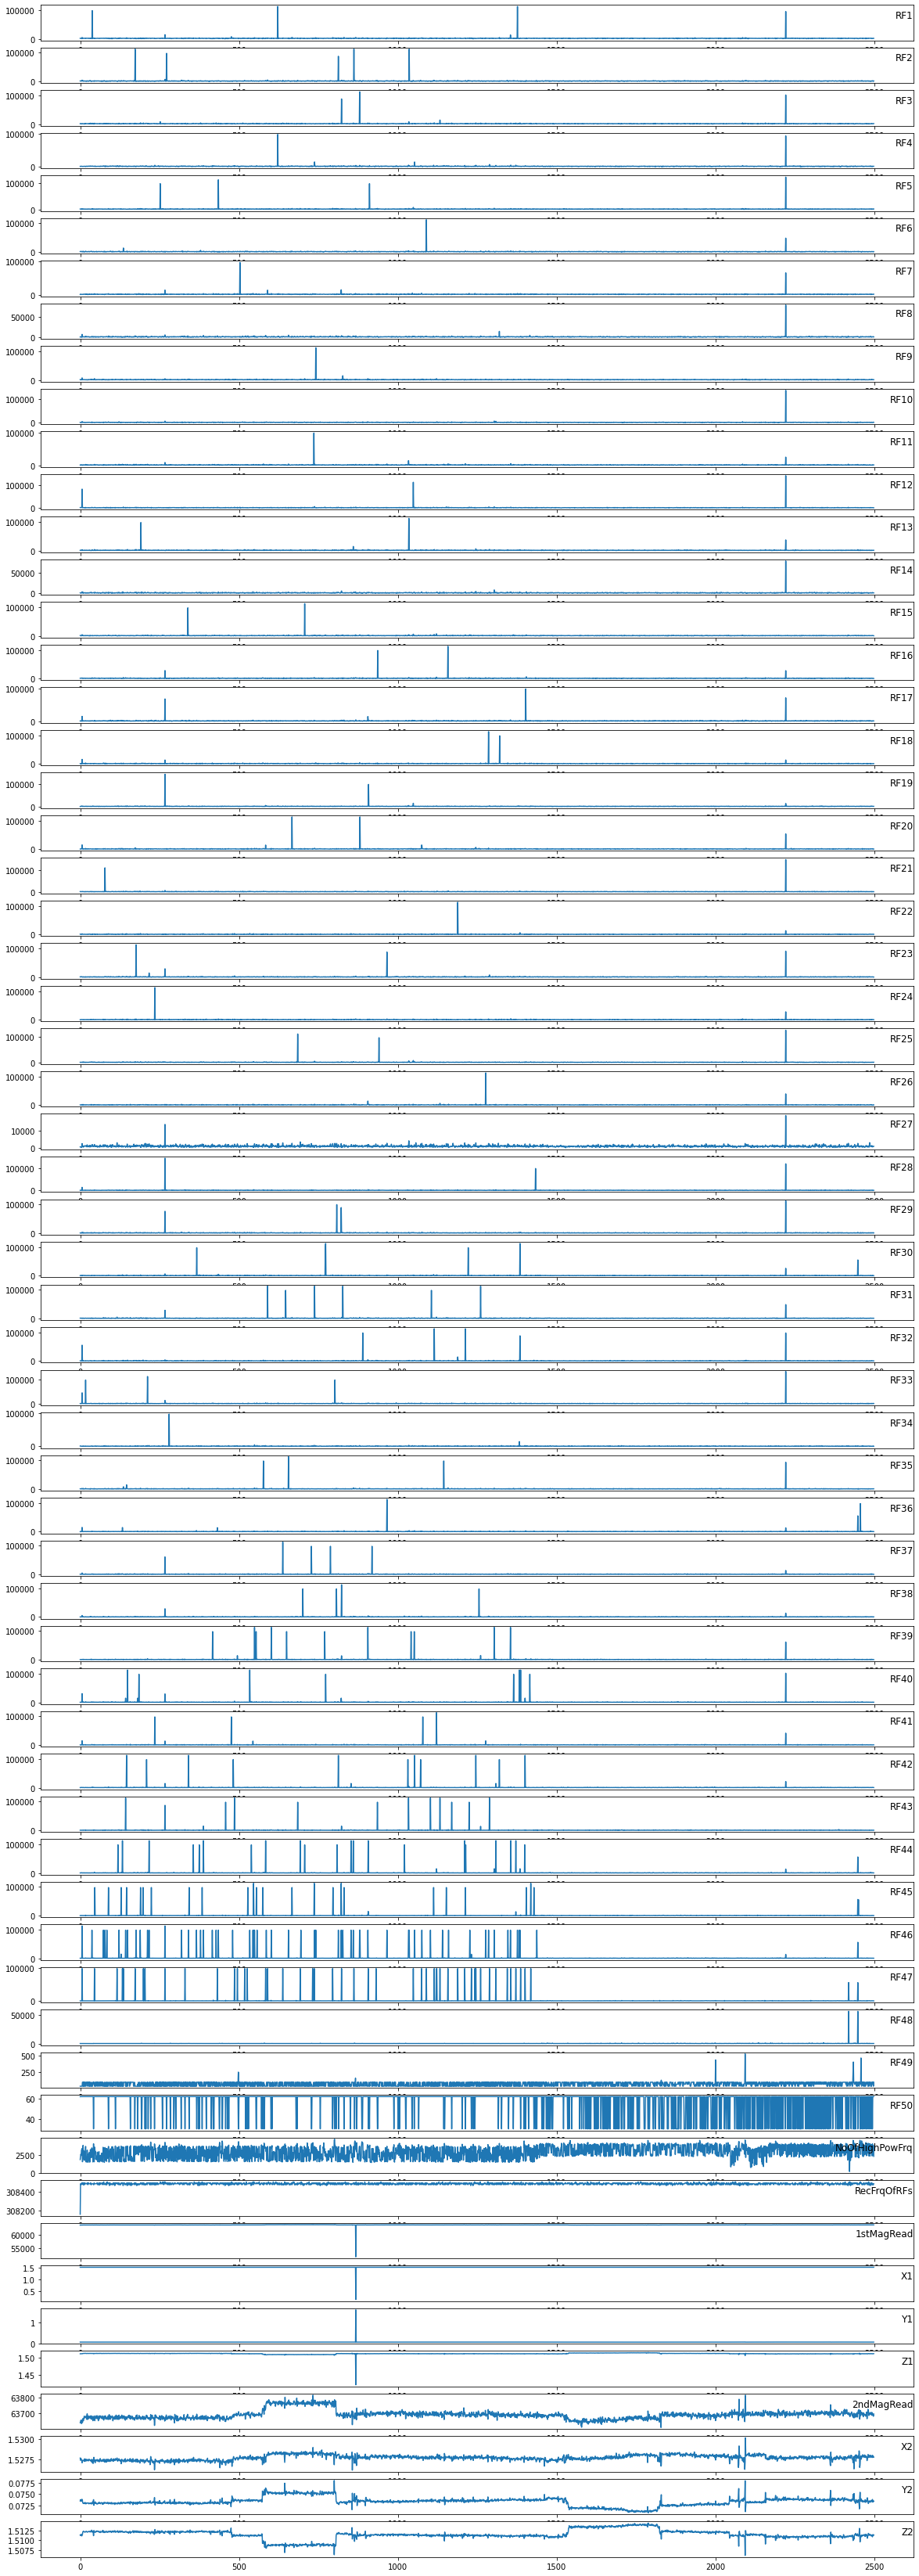

In [27]:
dataset = new_train.copy()
values = dataset.values
# specify columns to plot
groups = [x for x in range(60)]
i = 1
# plot each column
plt.figure(figsize=(20,60))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [28]:
df.shape

(4091, 61)

In [29]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset = df.copy()
value = dataset.values
# integer encode direction
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = value.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# scaled = np.hstack([train.Category.values[:, np.newaxis], scaled_])
# frame as supervised learning
reframed = series_to_supervised(scaled, 3, 1)
# drop columns we don't want to predict
# reframed.drop(reframed.columns[np.r_[61:122]], axis=1, inplace=True)
reframed.drop(reframed.columns[np.r_[60,121,182]], axis=1, inplace=True)
print(reframed.head())

   var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3   0.013962   0.015604   0.013688   0.012904   0.013286   0.015331   
4   0.013702   0.018635   0.008495   0.009452   0.012045   0.012058   
5   0.015621   0.013154   0.014525   0.013233   0.010790   0.014251   
6   0.013154   0.015620   0.010688   0.018903   0.011292   0.018909   
7   0.017265   0.014798   0.007125   0.018273   0.014053   0.015073   

   var7(t-3)  var8(t-3)  var9(t-3)  var10(t-3)  var11(t-3)  var12(t-3)  \
3   0.010071   0.009782   0.013140    0.009812    0.010386    0.012855   
4   0.018903   0.022327   0.013976    0.008451    0.012917    0.011778   
5   0.013862   0.019585   0.005755    0.001827    0.016068    0.008070   
6   0.013862   0.013709   0.009865    0.007081    0.006931    0.010905   
7   0.012917   0.017235   0.015620    0.009593    0.016383    0.015267   

   var13(t-3)  var14(t-3)  var15(t-3)  var16(t-3)  var17(t-3)  var18(t-3)  \
3    0.009582    0.014328    0.014784    0.012045  

In [30]:
# reframed.columns[[9,10,11,12,13,14,15]]

In [239]:
# split into train and test sets
values = reframed.values
n_train_hours = 2496
df_train = values[:n_train_hours, :]
# df_val = values[n_train_hours:2497, :]
df_test = values[n_train_hours-8:, :]
# split into input and outputs
train_X, train_y = df_train[:,  :-1], df_train[:, -1]
# val_X, val_y = df_val[:, :-1], df_val[:, -1]
test_X, test_y = df_test[:, :-1], df_test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2496, 1, 240) (2496,) (1600, 1, 240) (1600,)


In [240]:
30 

30

In [241]:
50*32

1600

In [242]:
def computeHCF(x, y):
    if x > y:
        smaller = y
    else:
        smaller = x
    for i in range(1, smaller+1):
        if((x % i == 0) and (y % i == 0)):
            hcf = i

    return hcf

batch_size= computeHCF(train_X.shape[0], test_X.shape[0])
batch_size

64

In [243]:
train_X[0]

array([[1.39619270e-02, 1.56040918e-02, 1.36881657e-02, 1.29039856e-02,
        1.32860821e-02, 1.53312599e-02, 1.00710485e-02, 9.78204794e-03,
        1.31402304e-02, 9.81160533e-03, 1.03860814e-02, 1.28547270e-02,
        9.58193839e-03, 1.43276369e-02, 1.47837205e-02, 1.20452018e-02,
        1.07011590e-02, 8.48654378e-03, 3.02506168e-03, 5.47879841e-03,
        9.59166512e-03, 1.23197231e-02, 1.01291556e-02, 5.20150410e-03,
        7.24926824e-03, 7.66524533e-03, 3.00178453e-02, 5.13782818e-03,
        4.71976399e-03, 6.02264190e-03, 1.04026226e-02, 7.93878268e-03,
        6.00658869e-03, 1.22741573e-02, 7.39126187e-03, 3.01127508e-03,
        5.74905984e-03, 3.55861965e-03, 3.28485901e-03, 2.46363948e-03,
        2.18981598e-03, 1.64229446e-03, 2.73733749e-03, 1.36853359e-03,
        1.91605533e-03, 1.09474524e-03, 9.43848980e-04, 1.10457558e-03,
        0.00000000e+00, 9.97841537e-01, 3.70859444e-01, 0.00000000e+00,
        9.65528011e-01, 9.98440087e-01, 2.69334018e-03, 9.466018

In [244]:
n_train_hours

2496

In [245]:
df_train.shape

(2496, 241)

In [246]:
train_y

array([0., 0., 0., ..., 1., 1., 0.], dtype=float32)

In [247]:
from matplotlib import pyplot

In [248]:
train_X.shape, test_X.shape

((2496, 1, 240), (1600, 1, 240))

In [251]:
batch_size = 32

In [252]:
# design network
model = Sequential()
model.add(LSTM(10, batch_input_shape=(batch_size, 1, train_X.shape[2]), stateful=True, return_sequences=True))
model.add(LSTM(10, batch_input_shape=(batch_size, 1, train_X.shape[2]), stateful=True, return_sequences=True))
model.add(LSTM(10, batch_input_shape=(batch_size, 1, train_X.shape[2]), stateful=True, return_sequences=True))
model.add(LSTM(10, batch_input_shape=(batch_size, 1, train_X.shape[2]), stateful=True))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
# # fit network
# history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(val_X, val_y), verbose=2, shuffle=False)
# # plot history
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()

In [253]:
for i in range(100):
    model.fit(train_X, train_y, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

Epoch 1/1
 - 1s - loss: 0.6470 - accuracy: 0.6815
Epoch 1/1
 - 0s - loss: 0.6406 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6367 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6345 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6329 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6318 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6309 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6302 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6296 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6291 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6287 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6283 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6279 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6276 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6274 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6271 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6269 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6267 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6265 - accuracy: 0.6835
Epoch 1/1
 - 0s - loss: 0.6263 - accuracy: 0.6835


In [254]:
# make predictions
trainPredict = model.predict(train_X, batch_size=batch_size)
model.reset_states()

In [255]:
testPredict = model.predict(test_X, batch_size=batch_size)

In [256]:
print(accuracy_score(train_y, np.round(trainPredict)))
print('')
print(confusion_matrix(train_y, np.round(trainPredict)))

0.7151442307692307

[[1542  164]
 [ 547  243]]


In [174]:
print(accuracy_score(val_y,  np.round(valPredict)))
print('')
print(confusion_matrix(val_y,  np.round(valPredict)))

0.6196172248803827

[[224  30]
 [129  35]]


In [161]:
len(train_X[0])

1

In [57]:
len(val_y)

397

In [58]:
# make a prediction
yhat = model.predict(val_X)
y_preds = np.round(yhat)
# [[221  29]
#  [ 31 118]]
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# # invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)
print(accuracy_score(val_y, y_preds))
print('')
print(confusion_matrix(val_y, y_preds))

0.6347607052896725

[[223  25]
 [120  29]]


In [168]:
print(metrics.classification_report(val_y, np.round(valPredict), labels=[0,1]))

              precision    recall  f1-score   support

           0       0.64      0.89      0.75       254
           1       0.58      0.24      0.34       164

    accuracy                           0.63       418
   macro avg       0.61      0.56      0.54       418
weighted avg       0.62      0.63      0.59       418

ERROR! Session/line number was not unique in database. History logging moved to new session 734


In [165]:
# from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

def adjust_threshold(predicted_proba, y_val):
    step_factor = 0.05 
    threshold_value = 0.2
    roc_score=0
    predicted_proba = np.ravel(predicted_proba) #probability of prediction
    print('')
    while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
        temp_thresh = threshold_value
        predicted = (predicted_proba >= temp_thresh).astype('int') #change the class boundary for prediction
#         print('Threshold',temp_thresh,'--',accuracy_score(y_val, predicted))
        if roc_score<accuracy_score(y_val, predicted): #store the threshold for best classification
            roc_score = accuracy_score(y_val, predicted)
            thrsh_score = threshold_value
        threshold_value = threshold_value + step_factor
    print('---Optimum Threshold ---',thrsh_score,'--Accuracy_Score--',roc_score)
    
    predicted = (predicted_proba >= thrsh_score).astype('int')
    print(metrics.classification_report(y_val, predicted, labels=[0,1]))
    # --confusion matrix
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_val, predicted))

In [166]:
np.ravel(valPredict).shape

(418,)

ERROR! Session/line number was not unique in database. History logging moved to new session 732


In [167]:
adjust_threshold(valPredict, val_y)


---Optimum Threshold --- 0.5499999999999999 --Accuracy_Score-- 0.6435406698564593
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       254
           1       0.63      0.23      0.33       164

    accuracy                           0.64       418
   macro avg       0.64      0.57      0.54       418
weighted avg       0.64      0.64      0.59       418


Confusion Matrix:
[[232  22]
 [127  37]]


In [257]:
test_pred =  model.predict(test_X)
np.round(test_pred)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [259]:
len(test_pred[4:])

1596

In [210]:
predicted_result = np.round(testPredict)

In [211]:
o_test = pd.read_csv('CSE_DSIntro1_TEST.csv')

In [212]:
submission = pd.DataFrame()
submission['Id'] = o_test['Id']
submission['Category'] = predicted_result.astype(int)

In [213]:
submission.head()

,Id,Category
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [214]:
submission.shape

(1591, 2)

In [215]:
submission.Category.value_counts()

0    1148
1     443
Name: Category, dtype: int64

In [216]:
submission.Category.value_counts()[1]/(submission.Category.value_counts()[0]+submission.Category.value_counts()[1])

0.278441231929604

In [217]:
submission.dtypes

Id          int64
Category    int32
dtype: object

In [218]:
submission.to_csv('F:/predictions.csv', index=False)

In [219]:
sub = pd.read_csv('F:/predictions.csv')
sub.head()

,Id,Category
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [220]:
prin(ddw

SyntaxError: unexpected EOF while parsing (<ipython-input-220-305f708a8d86>, line 1)

## Compare with old predictions

In [226]:
past_pred = pd.read_csv('F:/predictions 72.5.csv')

In [227]:
past_pred['new_submission'] = submission['Category']

In [228]:
past_pred

,Id,Category,new_submission
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0
5,6,0,0
6,7,0,0
7,8,0,0
8,9,0,0
9,10,0,0
